# Advanced data selection

Often times we want to subselect neural data that match certain meta data parameters. For example, to compare neurophysiology on vs. off deep brain stimulation, we would need to filter data by therapy status. We could also filter by stimulation frequency, stimulation amplitude, sensing sampling rate, etc. 

This template is an example of how to use Rune's API to perform a data query filtered by meta data. We specify filtering parameters and target values, and we retrieve a list of time stamps for data epochs that match our critera. These time stamps can then be used to obtain raw time series, spectrograms, and/or power spectra.

In [1]:
import requests
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

## Functions for API calls

These wrapper functions use Rune's API to pull meta data about stimulation, sensing, and adaptive parameters. The outputs are state values for each parameter, in addition to time stamps for each state value. 

Additionally, the API can be used to pull raw neural time series data, spectrograms, and power spectra. A wrapper function for pulling neural time series is included for demonstration of how to retrieve data after we have identified time stamps for data of interest.

In [2]:
def get_stimulation_meta_data(start_time, end_time, key_id, key_secret, device_id):
    '''
    Returns stimulation parameters
    
    Input: 
        start_time and end_time as unix time stamps
        API credentials
    Output: 
        Dataframe with stimulation parameters
    '''
    
    url = "https://stream.runelabs.io/v1/state.json"
    headers = {
        'X-Rune-Client-Key-ID': key_id,
        'X-Rune-Client-Access-Key': key_secret
    }
    params = {
        'device_id': device_id,
        'start_time': start_time,
        'end_time': end_time,
        'timestamp': 'unix',
        'event': 'stimulation_state',
        'fields': 'therapy_status,'
                  'pulse_width_lower_limit_seconds,'
                  'pulse_width_upper_limit_seconds,'
                  'ramp_repeat,'
                  'ramp_time,rate_hz,'
                  'rate_lower_limit_hz,'
                  'rate_upper_limit_hz,'
                  'therapy_group_id,'
                  'therapy_config_valid,'
                  'program.0.amplitude_amps,'
                  'program.0.pulse_width_seconds,'
                  'program.0.valid,'
                  'program.0.subvalid,'
                  'program.1.amplitude_amps,'
                  'program.1.pulse_width_seconds,'
                  'program.1.valid,'
                  'program.1.subvalid,'
                  'program.2.amplitude_amps,'
                  'program.2.pulse_width_seconds,'
                  'program.2.valid,'
                  'program.2.subvalid,'
                  'program.3.amplitude_amps,'
                  'program.3.pulse_width_seconds,'
                  'program.3.valid,'
                  'program.3.subvalid,'
                  'program.0.electrode.0,'
                  'program.0.electrode.1,'
                  'program.0.electrode.2,'
                  'program.0.electrode.4,'
                  'program.0.electrode.8,'
                  'program.0.electrode.16,'
                  'program.0.electrode.32,'
                  'program.0.electrode.64,'
                  'program.0.electrode.128,'
                  'program.1.electrode.0,'
                  'program.1.electrode.1,'
                  'program.1.electrode.2,'
                  'program.1.electrode.4,'
                  'program.1.electrode.8,'
                  'program.1.electrode.16,'
                  'program.1.electrode.32,'
                  'program.1.electrode.64,'
                  'program.1.electrode.128,'
                  'program.2.electrode.0,'
                  'program.2.electrode.1,'
                  'program.2.electrode.2,'
                  'program.2.electrode.4,'
                  'program.2.electrode.8,'
                  'program.2.electrode.16,'
                  'program.2.electrode.32,'
                  'program.2.electrode.64,'
                  'program.2.electrode.128,'
                  'program.3.electrode.0,'
                  'program.3.electrode.1,'
                  'program.3.electrode.2,'
                  'program.3.electrode.4,'
                  'program.3.electrode.8,'
                  'program.3.electrode.16,'
                  'program.3.electrode.32,'
                  'program.3.electrode.64,'
                  'program.3.electrode.128'
    }
    response = requests.get(url, headers=headers, params=params).json()
    df = pd.DataFrame(response['result'])  
    
    if sum(df.drop(['time', 'cardinality'], axis=1).any())==0:
        print('No stimulation meta data found')
        
    return df


def get_sensing_meta_data(start_time, end_time, key_id, key_secret, device_id):
    '''
    Returns sensing parameters
    
    Input: 
        start_time and end_time as unix time stamps
        API credentials
    Output: 
        Dataframe with stimulation parameters
    '''
    
    url = "https://stream.runelabs.io/v1/state.json"
    headers = {
        'X-Rune-Client-Key-ID': key_id,
        'X-Rune-Client-Access-Key': key_secret
    }
    params = {
        'device_id': device_id,
        'start_time': start_time,
        'end_time': end_time,
        'timestamp': 'unix',
        'event': 'sampling_frequency',
        'fields': 'frequency_hz'
    }
    response = requests.get(url, headers=headers, params=params).json()
    df = pd.DataFrame(response['result'])
    
    if sum(df.drop(['time', 'cardinality'], axis=1).any())==0:
        print('No sensing meta data found')
        
    return df


def get_adaptive_meta_data(start_time, end_time, key_id, key_secret, device_id):
    '''
    Returns adaptive stimulation settings
    
    Input: 
        start_time and end_time as unix time stamps
        API credentials
    Output: 
        Dataframe with stimulation parameters
    '''
    
    url = "https://stream.runelabs.io/v1/state.json"
    headers = {
        'X-Rune-Client-Key-ID': key_id,
        'X-Rune-Client-Access-Key': key_secret
    }
    params = {
        'device_id': device_id,
        'start_time': start_time,
        'end_time': end_time,
        'timestamp': 'unix',
        'event': 'stimulation_state.adaptive',
        'fields': 'adaptive_state,'
                  'in_startup_holdoff,'
                  'sensing_status,'
                  'stim_flags,'
                  'stim_rate_hz,'
                  'ld0.detection_status,'
                  'ld0.fixed_decimal_point,'
                  'ld0.threshold.high,'
                  'ld0.threshold.low,'
                  'ld0.output,'
                  'ld0.feature.0,'
                  'ld0.feature.1,'
                  'ld0.feature.2,'
                  'ld0.feature.3,'
                  'ld1.detection_status,'
                  'ld1.fixed_decimal_point,'
                  'ld1.threshold.high,'
                  'ld1.threshold.low,'
                  'ld1.output,'
                  'ld1.feature.0,'
                  'ld1.feature.1,'
                  'ld1.feature.2,'
                  'ld1.feature.3,'
                  'program.0.amplitude_amp,'
                  'program.1.amplitude_amp,'
                  'program.2.amplitude_amp,'
                  'program.3.amplitude_amp'
    }
    
    response = requests.get(url, headers=headers, params=params).json()
    df = pd.DataFrame(response['result']) 
    
    if sum(df.drop(['time', 'cardinality'], axis=1).any())==0:
        print('No adaptive meta data found')
        
    return df


def get_neural_time_series(start_time, end_time, channel, key_id, key_secret, device_id, save_directory):
    '''
    Retrieves raw neural time series between two time stamps and saves data to a csv
    
    Input: 
        start_time and end_time as unix time stamps
        channel, comma separated string of channel number(s)
        API credentials
        save_directory, filepath for saving
    '''
    
    url = "https://stream.runelabs.io/v1/lfp.csv"
    headers = {
        'X-Rune-Client-Key-ID': key_id,
        'X-Rune-Client-Access-Key': key_secret
    }
    params = {
        'channels': channel,
        'device_id': device_id,
        'start_time': start_time,
        'end_time': end_time,
        'timestamp': 'unix',
    }   
    
    with requests.get(url, headers=headers, params=params, stream=True) as r:
        r.raise_for_status()

        with open(save_directory, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)

## Functions for finding data epochs

Rune's API returns timestamps for state values. These timestamps reflect times when information about these state values were available and/or changed. The following functions take those timestamps and generate time windows, or epochs, where data match individual or multiple criteria. 

In [3]:
def find_epochs(timestamp_series, state_series, state_match):
    '''
    Returns start/stop time of data epochs based off state changes in meta data
    For example, we want to find all data epochs in which sampling rate == 250 
    Each epoch starts when the first sampling rate event == 250 
    Each epoch ends when sampling rate changes to different value
    
    Input: 
        time_series - unix time stamps for each state <pd series>
        state_series - values for a particular state <pd series>
        state_match - desired state value <int, float, or string>
    Output: 
        epochs - list of unix time stamps for epoch start/stop
    '''

    # identify whether state values are equal to state_match or not    
    # calculate changes in adjacent values to identify state changes
    match = pd.DataFrame([1 if x == state_match else 0 for x in state_series])
    match['change'] = match.diff()
    
    # when 'change' is 0, then a current value is identical to the previous value
    # an epoch begins when the change value is 1
    # an epoch ends when the change value is -1
    start_idx = [((np.isnan(x) and y == 1) or x == 1) for x,y in zip(match['change'],match[0])]
    stop_idx = [x == -1 for x in match['change']]
    
    # obtain datetime stamps for the start and stop of all epochs
    window_start = timestamp_series[start_idx]
    window_stop = timestamp_series[stop_idx]

    # if the last epoch has no stop, add the last datetime stamp as the stop
    if len(window_start) > len(window_stop):
        window_stop.loc[len(window_stop)] = timestamp_series.iloc[-1]
        
    # make array of start/stop times
    epochs = np.array([window_start[:], window_stop[:]]).transpose()

    return epochs


def find_overlapping_epochs(*conditions):
    '''
    Return epochs where all conditions are true.

    Input:
        One or more conditions. Each condition is a list of epochs.
        Each epoch is a list/tuple with 2 elements: the start and
        end time of a time interval where the condition was true.

    Output:
        A list of tuples, where each tuple represents the start and
        end time of an epoch where all the conditions are true
    '''

    # Compile a set of all the timestamps (the start times AND
    # end times of any of our conditions).
    times = set()

    # Also create a dictionary that summarizes the overall change at
    # each timestamp: the net number of conditions that "turn on" (or
    # "become" true).
    change_at_time = defaultdict(int)

    for condition in conditions:
        for epoch in condition:
            start, end = epoch
            times.add(start)
            times.add(end)
            # When a condition starts, the change at time t is positive
            change_at_time[start] += 1
            # When a condition ends, the change at time t is negative
            change_at_time[end] -= 1

    results = []

    # Now go through the timestamps *in order*, and keep track of
    # the cumulative sum of change_at_time:
    num_on = 0

    num_conditions = len(conditions)

    # When we find a timestamp where all of the conditions are true
    # (i.e. cumulative sum = num_conditions), we'll keep track of the
    # start time:
    current_epoch_start = None

    for time in sorted(times):
        num_on += change_at_time[time]
        if num_on == num_conditions and current_epoch_start == None:
            current_epoch_start = time

        if num_on != num_conditions and current_epoch_start != None:
            results.append((current_epoch_start, time))
            current_epoch_start = None

    if not results:
        print('No epochs matching all criteria')
    
    return results


def filter_by_epoch_duration(epochs, min_duration):
    '''
    Given a list of epoch start/end times, returns epoch start/end times
    that are at least minimum duration (sec)
    '''
    epoch_durations = [epoch[1]-epoch[0] for epoch in epochs]
    keep_idx = [epoch_duration>=min_duration for epoch_duration in epoch_durations]
    
    return np.array(epochs_overlap_all)[np.array(keep_idx)].tolist()

## Function for plotting data 

This function is for visualizing data availability that meet filtering criteria.

Note: In this notebook, plots are static. Use magic function `%matplotlib notebook` for interactive zooming and panning.

In [4]:
def plot_epochs_matching_meta_data_filter(condition_names,*conditions):
    '''
    Plots one or more conditions and the times in which those conditions were met
    
    Input:
        List of condition names and list of start/end times for epochs matching each condition
    '''
    
    num_conditions = len(conditions)
    
    fig,ax = plt.subplots(figsize=(12,5))

    for idx,condition in enumerate(conditions):
        for epoch in condition:
            ax.plot([datetime.datetime.fromtimestamp(epoch[0]), datetime.datetime.fromtimestamp(epoch[1])], [idx, idx], linewidth=25)

    plt.xticks(rotation=90)
    plt.yticks(np.arange(num_conditions), condition_names)
    plt.tight_layout()
    plt.xlabel('Time')
    plt.ylabel('Filter Criteria')
    plt.title('Data Availability')


## Data selection in a single subject

First we will use the API to pull all meta data. We will specify which parameters we want to filter by, and then we will identify epochs in which all filtering criteria were met. We can customize which meta data parameters and how many we use.

## 1. Initialize API credentials

First initialize your credentials for accessing patient data through the API. These credentials are patient-specific and can be found on the Rune web app https://app.runelabs.io/patients. In the code below, replace `%env ...` with your own credential strings.

In [5]:
# subj credentials

key_id = %env rcs07_key_id
key_secret = %env rcs07_key_secret
device_id = %env rcs07_device_id_right

Specify time of interest for pulling meta data. Here we specify a particular date range, but if you want to pull **all** meta data, you can set `start_time` to 0 and `end_time` to today:
```
start_time = 0
end_time = datetime.datetime.now().timestamp()
```

All json API outputs are paginated per 30,000 entries. If you are requesting data for long periods of time, keep in mind that results may extend beyond 1 page.

In [6]:
# specify time of interest

start_time = datetime.datetime(2019, 9, 1).timestamp()  # unix time stamp <datetime>
end_time = datetime.datetime(2020, 4, 27).timestamp()   # unix time stamp <datetime>

## 2. Pull meta data for stimulation and sensing parameters

In [7]:
# get stimulation, sensing, and adaptive meta data

stimulation_meta_data = get_stimulation_meta_data(
    start_time, 
    end_time, 
    key_id, 
    key_secret,
    device_id
)

sensing_meta_data = get_sensing_meta_data(
    start_time, 
    end_time, 
    key_id, 
    key_secret, 
    device_id
)

adaptive_meta_data = get_adaptive_meta_data(
    start_time, 
    end_time, 
    key_id, 
    key_secret, 
    device_id
)

There are various sensing and stimulation related parameters that we can filter by. A full list of parameters are below: 

In [8]:
print('Stimulation Parameters: ')
print(*list(stimulation_meta_data.columns[1:]), sep = "\n") 
print('\nSensing Parameters: ')
print(*list(sensing_meta_data.columns[1:]), sep = "\n")
print('\nAdaptive Parameters: ')
print(*list(adaptive_meta_data.columns[1:]), sep = "\n")

Stimulation Parameters: 
program.0.amplitude_amps
program.0.electrode.0
program.0.electrode.1
program.0.electrode.128
program.0.electrode.16
program.0.electrode.2
program.0.electrode.32
program.0.electrode.4
program.0.electrode.64
program.0.electrode.8
program.0.pulse_width_seconds
program.0.subvalid
program.0.valid
program.1.amplitude_amps
program.1.electrode.0
program.1.electrode.1
program.1.electrode.128
program.1.electrode.16
program.1.electrode.2
program.1.electrode.32
program.1.electrode.4
program.1.electrode.64
program.1.electrode.8
program.1.pulse_width_seconds
program.1.subvalid
program.1.valid
program.2.amplitude_amps
program.2.electrode.0
program.2.electrode.1
program.2.electrode.128
program.2.electrode.16
program.2.electrode.2
program.2.electrode.32
program.2.electrode.4
program.2.electrode.64
program.2.electrode.8
program.2.pulse_width_seconds
program.2.subvalid
program.2.valid
program.3.amplitude_amps
program.3.electrode.0
program.3.electrode.1
program.3.electrode.128
pro

We can filter by any combination of parameters. Before specifying particular values for each parameter, we can check what potential values are:

In [9]:
print('Unique values for sampling frequency: ')
print(sensing_meta_data.frequency_hz.unique())

Unique values for sampling frequency: 
[ 500 1000  250]


## 3. Identify epochs that match meta data parameters

### Example 1

We will start off with an example filter using 2 parameters:
- Therapy status (off stimulation)
- Sampling frequency (250 hz)

In [10]:
# meta data filter settings

target_therapy_status = 0            # 0 = off, 1 = on <int>
target_sampling_frequency = 250      # sampling rate (hz) <int>

In [11]:
# get list of epochs matching each condition/criteria

epochs_therapy_status = find_epochs(
    stimulation_meta_data.time,
    stimulation_meta_data.therapy_status,
    target_therapy_status
)
epochs_sampling_frequency = find_epochs(
    sensing_meta_data.time,
    sensing_meta_data.frequency_hz,
    target_sampling_frequency
)

In [12]:
# find overlap across all epochs

epochs_overlap_all = find_overlapping_epochs(epochs_therapy_status, epochs_sampling_frequency)

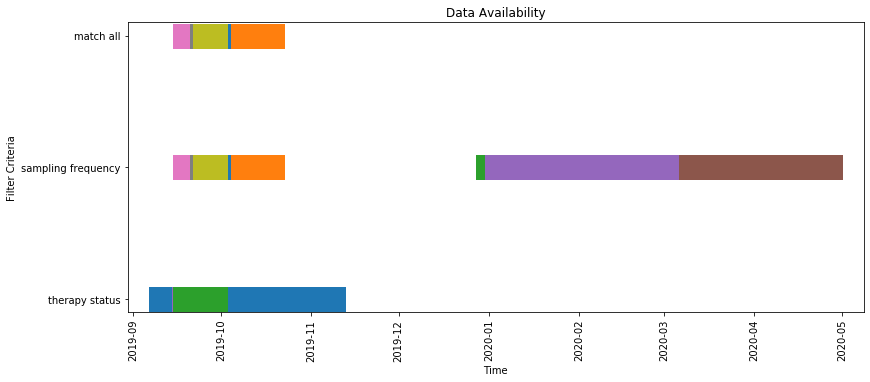

In [13]:
# plot data availability

plot_epochs_matching_meta_data_filter(
    [
        'therapy status',
        'sampling frequency',
        'match all'
    ],
    epochs_therapy_status,
    epochs_sampling_frequency,
    epochs_overlap_all
)

For each individual filtering parameter, shaded bars correspond to epochs when data exist and meet that criterion. The 'match all' row identifies epochs that meet all critera.

Note that time stamps are in UTC time, and will need to be adjusted for your particular time zone. Pacific time adjustment is -8 hours (-28800 seconds).

### Example 2

Here is a second example, using a few more parameters to filter by:
- Therapy status (on stimulation)
- Sampling frequency (250 hz)
- Stimulation frequency (130.2 hz)
- Stimulation amplitude (.002 A)
- Therapy group id (2)
- Pulse width lower limit (.00006 s)
- Pulse width upper limit (.0001 s)


We can also add a filter parameter to only keep epochs of a minimum duration:
- Minimum epoch duration (60 s)

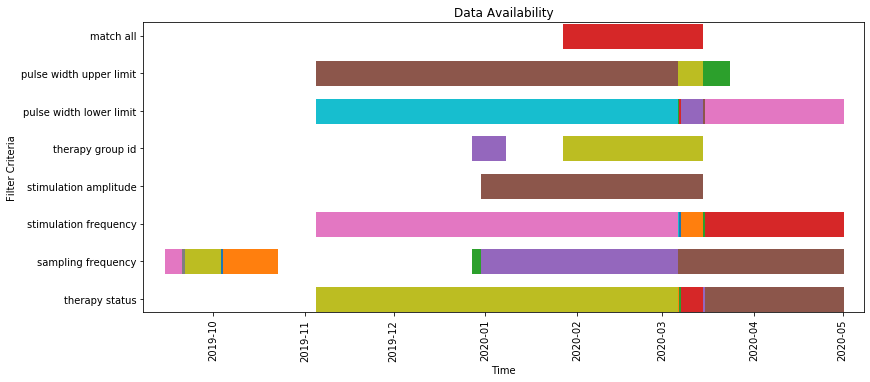

In [14]:
# meta data filter settings
target_therapy_status = 1                            # (0 = off, 1 = on) <int>
target_sampling_frequency = 250                      # sampling rate (hz) <int>
target_stimulation_frequency = 130.2                 # stimulation frequency (hz) <float>
target_stimulation_amplitude = 0.002                 # stimulation amplitude (A) <float>
target_therapy_group_id = 2                          # group id <int>
target_pulse_width_lower_limit_seconds = 6.e-05      # lower pulse width limit (sec) <float>
target_pulse_width_upper_limit_seconds = 1.e-04      # upper pulse width limit (sec) <float>
min_epoch_duration = 60                              # minimum epoch duration (sec) <int>

# get list of epochs matching each condition/criteria
epochs_therapy_status = find_epochs(
    stimulation_meta_data.time,
    stimulation_meta_data.therapy_status,
    target_therapy_status
)
epochs_sampling_frequency = find_epochs(
    sensing_meta_data.time,
    sensing_meta_data.frequency_hz,
    target_sampling_frequency
)
epochs_stimulation_frequency = find_epochs(
    stimulation_meta_data.time,
    stimulation_meta_data.rate_hz,
    target_stimulation_frequency
)
epochs_stimulation_amplitude = find_epochs(
    stimulation_meta_data.time,
    stimulation_meta_data['program.0.amplitude_amps'],
    target_stimulation_amplitude
)
epochs_therapy_group_id = find_epochs(
    stimulation_meta_data.time,
    stimulation_meta_data.therapy_group_id,
    target_therapy_group_id
)
epochs_pulse_width_lower_limit = find_epochs(
    stimulation_meta_data.time,
    stimulation_meta_data.pulse_width_lower_limit_seconds,
    target_pulse_width_lower_limit_seconds
)
epochs_pulse_width_upper_limit = find_epochs(
    stimulation_meta_data.time,
    stimulation_meta_data.pulse_width_upper_limit_seconds,
    target_pulse_width_upper_limit_seconds
)

# find overlap across all epochs
epochs_overlap_all = find_overlapping_epochs(
    epochs_therapy_status,
    epochs_sampling_frequency, 
    epochs_stimulation_frequency, 
    epochs_stimulation_amplitude, 
    epochs_therapy_group_id,
    epochs_pulse_width_lower_limit,
    epochs_pulse_width_upper_limit
)

# only keep epochs that are greater than or equal to the minimum duration
if epochs_overlap_all:
    epochs_overlap_all = filter_by_epoch_duration(epochs_overlap_all, min_epoch_duration)
    
# plot data availability
plot_epochs_matching_meta_data_filter(
    [
        'therapy status',
        'sampling frequency',
        'stimulation frequency',
        'stimulation amplitude',
        'therapy group id',
        'pulse width lower limit',
        'pulse width upper limit',
        'match all'
    ],
    epochs_therapy_status,
    epochs_sampling_frequency,
    epochs_stimulation_frequency,
    epochs_stimulation_amplitude, 
    epochs_therapy_group_id,
    epochs_pulse_width_lower_limit,
    epochs_pulse_width_upper_limit,
    epochs_overlap_all
)

### Example 3

In this last example, we will filter by adaptive stimulation parameters as well.

- Therapy status (on stimulation)
- Sampling frequency (250 hz)
- Adaptive sensing status (151, Medtronic code)
- Adaptive ld 0 detection status (15, Medtronic code)
- Minimum duration (10 min)

Certain parameters, including adaptive settings, are currently still the raw values from the json files. They will need to be 'translated' for meaning.

In [15]:
print('Unique values for sensing status: ')
print(adaptive_meta_data.sensing_status.unique())

Unique values for sensing status: 
[ 23 151]


In [16]:
print('Unique values for ld0 detection status: ')
print(adaptive_meta_data['ld0.detection_status'].unique())

Unique values for ld0 detection status: 
[ 0 47 15 64 32]


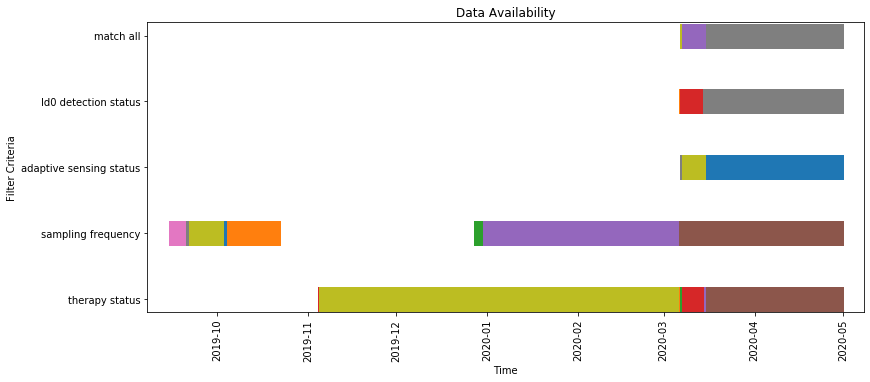

In [17]:
# meta data filter settings
target_therapy_status = 1                            # (0 = off, 1 = on) <int>
target_sampling_frequency = 250                      # sampling rate (hz) <int>
target_adaptive_sensing_status = 151                 # mdt code for adaptive sensing status
target_ld0_detection_status = 15                     # mdt code for ld0 detection status
min_epoch_duration = 10*60                           # minimum epoch duration (sec) <int>

# find epochs for each individual condition
epochs_therapy_status = find_epochs(
    stimulation_meta_data.time,
    stimulation_meta_data.therapy_status,
    target_therapy_status
)
epochs_sampling_frequency = find_epochs(
    sensing_meta_data.time,
    sensing_meta_data.frequency_hz,
    target_sampling_frequency
)
epochs_adaptive_sensing_status = find_epochs(
    adaptive_meta_data.time,
    adaptive_meta_data.sensing_status,
    target_adaptive_sensing_status
)
epochs_ld0_detection_status = find_epochs(
    adaptive_meta_data.time,
    adaptive_meta_data['ld0.detection_status'],
    target_ld0_detection_status
)

# find overlap across all epochs
epochs_overlap_all = find_overlapping_epochs(
    epochs_therapy_status,
    epochs_sampling_frequency, 
    epochs_adaptive_sensing_status,
    epochs_ld0_detection_status
)

# only keep epochs that are greater than or equal to the minimum duration
if epochs_overlap_all:
    epochs_overlap_all = filter_by_epoch_duration(epochs_overlap_all, min_epoch_duration)
    
# plot data availability
plot_epochs_matching_meta_data_filter(
    [
        'therapy status',
        'sampling frequency',
        'adaptive sensing status',
        'ld0 detection status',
        'match all'
    ],
    epochs_therapy_status,
    epochs_sampling_frequency,
    epochs_adaptive_sensing_status,
    epochs_ld0_detection_status,
    epochs_overlap_all
)

## 4. Use epoch time stamps to retrieve data

After selecting and specifying filtering criteria, the function `find_overlapping_epochs` returns  `epochs_overlap_all`, a list of time stamps that indicate epoch start and end times for every epoch that matches all filtering criteria. We can use these time stamps to obtain raw time series.

In [18]:
# print duration of each epoch

for idx,epoch in enumerate(epochs_overlap_all):
    start = datetime.datetime.fromtimestamp(epoch[0])
    stop = datetime.datetime.fromtimestamp(epoch[1])
    print('Epoch', str(idx), ':', stop-start)

Epoch 0 : 17:56:23.989000
Epoch 1 : 0:46:30.513000
Epoch 2 : 0:15:00.012000
Epoch 3 : 0:12:00.001000
Epoch 4 : 0:27:30.170000
Epoch 5 : 0:18:00.014000
Epoch 6 : 0:28:29.995000
Epoch 7 : 0:20:00.004000
Epoch 8 : 0:11:51.798000
Epoch 9 : 38 days, 8:29:14.895000


We can loop through the epochs, download the raw data, and save to CSV files. For demonstration, we will download the raw time series for epoch 3. 

Note: Currently, longer epochs (>1 day) will need to be cut up into smaller segments for the API calls, otherwise the request will time out. In the future, larger requests will be paginated.

In [19]:
# retrieve raw data for one epoch

save_directory = '/Users/witney/Documents/rune_data/rcs07_sample_epoch_time_series'

epoch_num = 3

get_neural_time_series(
    epochs_overlap_all[epoch_num][0], 
    epochs_overlap_all[epoch_num][1],
    '0,1,2,3',
    key_id, 
    key_secret, 
    device_id, 
    save_directory
)

In [20]:
# read signal from saved csv file

neural_time_series = pd.read_csv(save_directory)
neural_time_series.timestamp = pd.to_datetime(neural_time_series.timestamp, unit='s')
neural_time_series

,timestamp,channel.0,channel.1,channel.2,channel.3
0,2020-03-11 16:48:02.404000044,-0.000158,-0.000144,-0.000199,-0.000181
1,2020-03-11 16:48:02.407999992,-0.000150,-0.000134,-0.000192,-0.000157
2,2020-03-11 16:48:02.411999941,-0.000160,-0.000146,-0.000195,-0.000121
3,2020-03-11 16:48:02.415999889,-0.000153,-0.000137,-0.000197,-0.000112
4,2020-03-11 16:48:02.420000076,-0.000162,-0.000144,-0.000189,-0.000112
...,...,...,...,...,...
179779,2020-03-11 17:00:02.380000114,-0.000158,-0.000143,-0.000188,-0.000156
179780,2020-03-11 17:00:02.384000063,-0.000156,-0.000142,-0.000182,-0.000154
179781,2020-03-11 17:00:02.388000011,-0.000154,-0.000140,-0.000181,-0.000158
179782,2020-03-11 17:00:02.391999960,-0.000158,-0.000142,-0.000180,-0.000168


Text(0, 0.5, 'Voltage (V)')

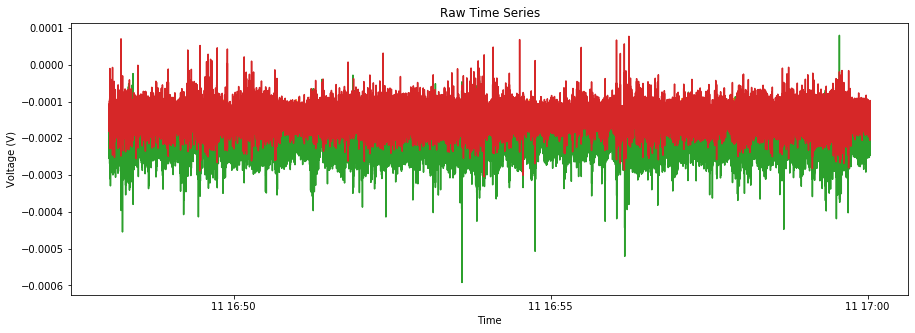

In [21]:
# plot epoch across all four channels

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(neural_time_series.timestamp,neural_time_series['channel.0'])
ax.plot(neural_time_series.timestamp,neural_time_series['channel.1'])
ax.plot(neural_time_series.timestamp,neural_time_series['channel.2'])
ax.plot(neural_time_series.timestamp,neural_time_series['channel.3'])
plt.title('Raw Time Series')
plt.xlabel('Time')
plt.ylabel('Voltage (V)')

## Summary

We pulled information about sensing, stimulation, and adaptive parameters for a single subject. We used these parameters to further filter the data and identify epochs in which all our criteria were met. The user can specify which combination of parameters to filter by. We then demonstrated how to use these time stamps to pull raw time series data to save as a CSV.